# Assignmnent 6

## Startup Success Prediction

### Authored by:
Ganti Uday

### Introduction and Overview 

In this project, we will be using a dataset from Kaggle - [Startup Success Prediction](https://www.kaggle.com/datasets/manishkc06/startup-success-prediction). The data contains industry trends, investment insights and individual company information.

We are given the input variables that include city, age_first_funding_year, age_last_funding_year, relationships, funding_rounds, funding_total_usd, milestones, age_first_milestone_year, age_last_milestone_year, state, industry_type, has_VC, has_angel, has_roundA, has_roundB, has_roundC, has_roundD, avg_participants, is_top500.

Our objective is to predict whether a startup which is currently operating turns into a success or a failure. The success of a company is defined as the event that gives the company's founders a large sum of money through the process of M&A (Merger and Acquisition).

We will try some Data Exploration, Prepcessing, and Visualization on the startup data.


## Business objective:

This data could be invalueable to potential investors who are trying to predict the success rate of a company. Since investors deal with a large amount of investment request, an efficient way to shortlisting them would save time and money.

### Step 1: Install and import necessary packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


import dateutil.parser
from datetime import date

from sklearn import preprocessing 

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, plot_roc_curve, roc_auc_score, roc_curve, auc, RocCurveDisplay, PrecisionRecallDisplay, precision_recall_curve


from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder

import warnings
warnings.filterwarnings('ignore')
np.random.seed(1)

### Step 2: Load Data

We are loading the csv data file from system by using pandas library and assigning it as a dataframe 

In [2]:
startup_df = pd.read_csv("startup_data.csv",)
startup_df.head(5)

random_seed = 1

### Step 3. Explore number of rows and columns 

Initial Exploration of loaded data

In [3]:
rows = startup_df.shape[0]
cols = startup_df.shape[1]
print(f"Rows={rows} and Cols={cols}")

Rows=923 and Cols=49


### Step 4. Rename Columns

Often times the column names can have blank spaces, or other issues. We often change column names because of this.

In [4]:
startup_df.columns = [s.strip().replace(' ', '_') for s in startup_df.columns]
startup_df.columns

Index(['Unnamed:_0', 'state_code', 'latitude', 'longitude', 'zip_code', 'id',
       'city', 'Unnamed:_6', 'name', 'labels', 'founded_at', 'closed_at',
       'first_funding_at', 'last_funding_at', 'age_first_funding_year',
       'age_last_funding_year', 'age_first_milestone_year',
       'age_last_milestone_year', 'relationships', 'funding_rounds',
       'funding_total_usd', 'milestones', 'state_code.1', 'is_CA', 'is_NY',
       'is_MA', 'is_TX', 'is_otherstate', 'category_code', 'is_software',
       'is_web', 'is_mobile', 'is_enterprise', 'is_advertising',
       'is_gamesvideo', 'is_ecommerce', 'is_biotech', 'is_consulting',
       'is_othercategory', 'object_id', 'has_VC', 'has_angel', 'has_roundA',
       'has_roundB', 'has_roundC', 'has_roundD', 'avg_participants',
       'is_top500', 'status'],
      dtype='object')

### Step 5. Drop any columns that are not interested

In [5]:
startup_df = startup_df.drop(columns=['Unnamed:_0', 'state_code', 'latitude', 'longitude','city','name',
                                      'labels','zip_code', 'id', 'Unnamed:_6', 'state_code.1', 'object_id','labels'])

In [6]:
rows = startup_df.shape[0]
cols = startup_df.shape[1]
print(f"Rows={rows} and Cols={cols}")

Rows=923 and Cols=37


### Step 6. Identify and Handle Any Missing Data
First, let's identify any columns that contain missing data...

In [7]:
startup_df["category_code"].unique()

array(['music', 'enterprise', 'web', 'software', 'games_video',
       'network_hosting', 'finance', 'mobile', 'education',
       'public_relations', 'security', 'other', 'photo_video', 'hardware',
       'ecommerce', 'advertising', 'travel', 'fashion', 'analytics',
       'consulting', 'biotech', 'cleantech', 'search', 'semiconductor',
       'social', 'medical', 'automotive', 'messaging', 'manufacturing',
       'hospitality', 'news', 'transportation', 'sports', 'real_estate',
       'health'], dtype=object)

In [8]:
startup_df.isna().sum()

founded_at                    0
closed_at                   588
first_funding_at              0
last_funding_at               0
age_first_funding_year        0
age_last_funding_year         0
age_first_milestone_year    152
age_last_milestone_year     152
relationships                 0
funding_rounds                0
funding_total_usd             0
milestones                    0
is_CA                         0
is_NY                         0
is_MA                         0
is_TX                         0
is_otherstate                 0
category_code                 0
is_software                   0
is_web                        0
is_mobile                     0
is_enterprise                 0
is_advertising                0
is_gamesvideo                 0
is_ecommerce                  0
is_biotech                    0
is_consulting                 0
is_othercategory              0
has_VC                        0
has_angel                     0
has_roundA                    0
has_roun

### Step 7. Imputing missing values

One of the initial process of data cleaning - adding missing data. We are addressing the missing values with the mean of the column. 

In [9]:
mean_age_first_milestone_year = startup_df['age_first_milestone_year'].mean()
mean_age_last_milestone_year = startup_df['age_last_milestone_year'].mean()


startup_df.age_first_milestone_year = startup_df.age_first_milestone_year.fillna(value=mean_age_first_milestone_year)
startup_df.age_last_milestone_year = startup_df.age_last_milestone_year.fillna(value=mean_age_last_milestone_year)


startup_df.closed_at = startup_df.closed_at.fillna(value=date.today())

### Step 8. Convert Date Object into datetime format for processing

Calculating the numer of days between the variables and removing the date variables. Because calculating number of days inbetween two specific dates will be better for processing as it is in numeric value than processing with date formate value

In [10]:
startup_df["founded_at"] = pd.to_datetime(startup_df["founded_at"])
startup_df["closed_at"] = pd.to_datetime(startup_df["closed_at"])
startup_df["first_funding_at"] = pd.to_datetime(startup_df["first_funding_at"])
startup_df["last_funding_at"] = pd.to_datetime(startup_df["last_funding_at"])


startup_df["startup_age_in_days"] = (startup_df["closed_at"] - startup_df["founded_at"]).dt.days
startup_df["funding_gap_in_days"] = (startup_df["last_funding_at"] - startup_df["first_funding_at"]).dt.days


startup_df.drop(["founded_at", "closed_at", "first_funding_at", "last_funding_at"], axis = 1, inplace = True)

Using Data Parser package, the variables storing 'date' strings are being converted into datetime formate for easy date time operation.
Also, removing the date variables after calculating the days inbetween them. 

### Step 9. Identify any categorical data

Indentifying the categorical variables and encoding both input and target variables 

Input variables are encoded with ordinal encoder 


In [11]:
enc = OrdinalEncoder()
startup_df.is_CA = enc.fit_transform(startup_df[['is_CA']])
startup_df.is_CA = enc.fit_transform(startup_df[['is_NY']])
startup_df.is_CA = enc.fit_transform(startup_df[['is_MA']])
startup_df.is_CA = enc.fit_transform(startup_df[['is_TX']])
startup_df.is_otherstate = enc.fit_transform(startup_df[['is_otherstate']])

startup_df.is_software = enc.fit_transform(startup_df[['is_software']])
startup_df.is_web = enc.fit_transform(startup_df[['is_web']])
startup_df.is_mobile = enc.fit_transform(startup_df[['is_mobile']])
startup_df.is_enterprise = enc.fit_transform(startup_df[['is_enterprise']])
startup_df.is_advertising = enc.fit_transform(startup_df[['is_advertising']])
startup_df.is_gamesvideo = enc.fit_transform(startup_df[['is_gamesvideo']])
startup_df.is_ecommerce = enc.fit_transform(startup_df[['is_ecommerce']])
startup_df.is_biotech = enc.fit_transform(startup_df[['is_biotech']])
startup_df.is_consulting = enc.fit_transform(startup_df[['is_consulting']])
startup_df.is_othercategory = enc.fit_transform(startup_df[['is_othercategory']])

startup_df.category_code = enc.fit_transform(startup_df[['category_code']])
startup_df.has_VC = enc.fit_transform(startup_df[['has_VC']])
startup_df.has_angel = enc.fit_transform(startup_df[['has_angel']])
startup_df.has_roundA = enc.fit_transform(startup_df[['has_roundA']])
startup_df.has_roundB = enc.fit_transform(startup_df[['has_roundB']])
startup_df.has_roundC = enc.fit_transform(startup_df[['has_roundC']])
startup_df.has_roundD = enc.fit_transform(startup_df[['has_roundD']])
startup_df.is_top500 = enc.fit_transform(startup_df[['is_top500']])

Output variables are encoded with Output encoder

In [12]:
startup_df.status = startup_df.status.replace("acquired", 1, regex=True)
startup_df.status = startup_df.status.replace("closed", 0, regex=True)

le = LabelEncoder()
le.fit_transform(startup_df['status'])
_ = le.fit_transform(startup_df['status'])

In [13]:
target = 'status'
predictors = ['age_first_funding_year','age_last_funding_year','age_first_milestone_year',
'age_last_milestone_year','relationships','funding_rounds','funding_total_usd',
'milestones','is_CA','is_NY','is_MA','is_TX','is_otherstate','category_code',
'is_software','is_web','is_mobile','is_enterprise','is_advertising','is_gamesvideo',
'is_ecommerce','is_biotech','is_consulting','is_othercategory','has_VC','has_angel',
'has_roundA','has_roundB','has_roundC','has_roundD','avg_participants','is_top500']

### Step 10.Transform Predictors

Training model can be sensitive to values in diffrent scale. We are scaling  data with the StandardScaler() function

In [14]:
scaler = preprocessing.StandardScaler()
scaler.fit(startup_df[predictors])

StandardScaler()

### Step 11.Spliting dataset into train and test data

we use normal spliting ratio of 70-30 

Where 70% of the entire data is used for training and rest 30% data is used for testing the trained model. From which we can analyse the scoring metrics. 

In [15]:
X = startup_df[predictors]
y = startup_df[target]


train_X,test_X,train_y,test_y=train_test_split(X,y,test_size=.3,random_state=1)

In [16]:
startup_df.head(5)

,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,is_CA,is_NY,...,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status,startup_age_in_days,funding_gap_in_days
0,2.2493,3.0027,4.6685,6.7041,3,3,375000,3,0.0,0,...,1.0,0.0,0.0,0.0,0.0,1.0000,0.0,1,5774,275
1,5.1260,9.9973,7.0055,7.0055,9,4,40100000,1,0.0,0,...,0.0,0.0,1.0,1.0,1.0,4.7500,1.0,1,8331,1778
2,1.0329,1.0329,1.4575,2.2055,5,1,2600000,2,0.0,0,...,0.0,1.0,0.0,0.0,0.0,4.0000,1.0,1,4967,0
3,3.1315,5.3151,6.0027,6.0027,5,3,40000000,1,0.0,0,...,0.0,0.0,1.0,1.0,1.0,3.3333,1.0,1,7600,797
4,0.0000,1.6685,0.0384,0.0384,2,2,1300000,1,0.0,0,...,1.0,0.0,0.0,0.0,0.0,1.0000,1.0,0,792,609


### Logistic Regression

By fitting the train data to the Logistic regression we are trying to calculate the probablity of Startup success.

In [17]:
logClassifier=LogisticRegression(random_state=1)

logClassifier.fit(train_X,train_y)

LogisticRegression(random_state=1)

Converting the train and test data into dataframe for logistic regression model training 

In [18]:
train_X = pd.DataFrame(train_X) 
test_X = pd.DataFrame(test_X)

Comparing the model predicted value of startup success and the actual value. This will gives us a overall idea of how the model is performing from the trained data

In [19]:
pd.DataFrame({"Predicted":logClassifier.predict(test_X),"Actual":test_y})

,Predicted,Actual
769,1,1
700,1,1
892,1,0
385,1,1
154,1,0
...,...,...
0,1,1
722,1,1
66,1,0
522,1,0


Calculating diffrent scoring metrics for the logistic regression without any hyper parameter, which will add and compare the diffrences below. 

In [20]:
y_pred = logClassifier.predict(test_X)
print("***********************")
print(f"{'Accuracy Score: ':18}{accuracy_score(test_y, y_pred):.3f}")
print(f"{'Precision Score: ':18}{precision_score(test_y, y_pred):.3f}")
print(f"{'Recall Score:':18}{recall_score(test_y, y_pred):.3f}")
print(f"{'F1 Score: ':18}{f1_score(test_y, y_pred):.3f}")
print("***********************")

***********************
Accuracy Score:   0.628
Precision Score:  0.628
Recall Score:     1.000
F1 Score:         0.772
***********************


### Step 13. Hyperpareter testing and k-fold cross validating for training the Logistic regression model

In [21]:
# Hyperparameter tuning is taking too long. RUN WITH CAUSTON

solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [10, 1.0, 0.1]
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values, max_iter=[50000])
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

best_logClassifer = GridSearchCV(estimator=LogisticRegression(random_state=1), param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)

#best_logClassifer = GridSearchCV(estimator=LogisticRegression(random_state=1),scoring='recall', param_grid=param_grid, cv=10, verbose=0,  n_jobs = -1)
_ = best_logClassifer.fit(train_X, train_y)

#train_X,test_X,train_y,test_y
tps = []
fps = []
tns = []
fns = []  
precs = []
recls = []

tprs = []
fprs = []
thres = []
for threshold in np.arange(0.0, 1.1, 0.1):
    y_pred= best_logClassifer.predict_proba(test_X)[:,1]>=threshold
    m = confusion_matrix(test_y, y_pred)
    TP = m[1,1]
    TN = m[0,0]
    FP = m[0,1]
    FN = m[1,0]
    TPR = TP/(TP+FN)
    FPR = FP/(FP+TN)
    recall = TP / (TP+FN)
    precision = TP / (TP+FP)
    tps.append(TP)
    fps.append(FP)
    tns.append(TN)
    fns.append(FN)
    tprs.append(TPR)
    fprs.append(FPR)
    recls.append(recall)
    precs.append(precision)
    thres.append(str(round(threshold,2)))

print(test_y.value_counts())
df = pd.DataFrame(list(zip(thres, tps, fps, tns, fns, fprs, tprs, precs, recls)), columns=['Threshold', 'TP', 'FP', 'TN', 'FN', 'FPR', 'TPR', 'Precision', 'Recall'])
df


/Users/ariv/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/ariv/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/ariv/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/ariv/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/ariv/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The l

1    174
0    103
Name: status, dtype: int64


,Threshold,TP,FP,TN,FN,FPR,TPR,Precision,Recall
0,0.0,174,103,0,0,1.000000,1.000000,0.628159,1.000000
1,0.1,174,103,0,0,1.000000,1.000000,0.628159,1.000000
2,0.2,172,96,7,2,0.932039,0.988506,0.641791,0.988506
3,0.3,170,79,24,4,0.766990,0.977011,0.682731,0.977011
4,0.4,164,67,36,10,0.650485,0.942529,0.709957,0.942529
5,0.5,148,52,51,26,0.504854,0.850575,0.740000,0.850575
6,0.6,132,39,64,42,0.378641,0.758621,0.771930,0.758621
7,0.7,118,30,73,56,0.291262,0.678161,0.797297,0.678161
8,0.8,84,22,81,90,0.213592,0.482759,0.792453,0.482759
9,0.9,56,11,92,118,0.106796,0.321839,0.835821,0.321839


In [22]:
y_pred = best_logClassifer.predict(test_X)
#train_X,test_X,train_y,test_y

print("***********************")
print(f"{'Accuracy Score: ':18}{accuracy_score(test_y, y_pred):.3f}")
print(f"{'Precision Score: ':18}{precision_score(test_y, y_pred):.3f}")
print(f"{'Recall Score:':18}{recall_score(test_y, y_pred):.3f}")
print(f"{'F1 Score: ':18}{f1_score(test_y, y_pred):.3f}")
print("***********************")


***********************
Accuracy Score:   0.718
Precision Score:  0.740
Recall Score:     0.851
F1 Score:         0.791
***********************


After adding hyper parameter tuning to the logistic regression model to find the best metrics parameters.

Accuracy Score:   0.628
Precision Score:  0.628
Recall Score:     1.000
F1 Score:         0.772
We can see the improvement in the regression model metrics where Accracy score increased by 9%

Precision socre increased by 11.2%

Recall improved to 85.1%

and F1 score increased by 1.9%

In [23]:
logClassifier.predict_proba(startup_df[predictors]).round(3)

array([[0.498, 0.502],
       [0.301, 0.699],
       [0.486, 0.514],
       ...,
       [0.284, 0.716],
       [0.419, 0.581],
       [0.397, 0.603]])

### ROC AUC

We are trying to plot the ROC curve for diffrent threshold values for the logistic regression model that we fit above. From the ROC curv we are trying to compare the Change of True Positive Rate with respect to decrese in False Positive Rate.
This will give us a good picture of how well the model predicts the startup success in diffrent threshold.

We are using SKLearn direct function to construct the ROC curve

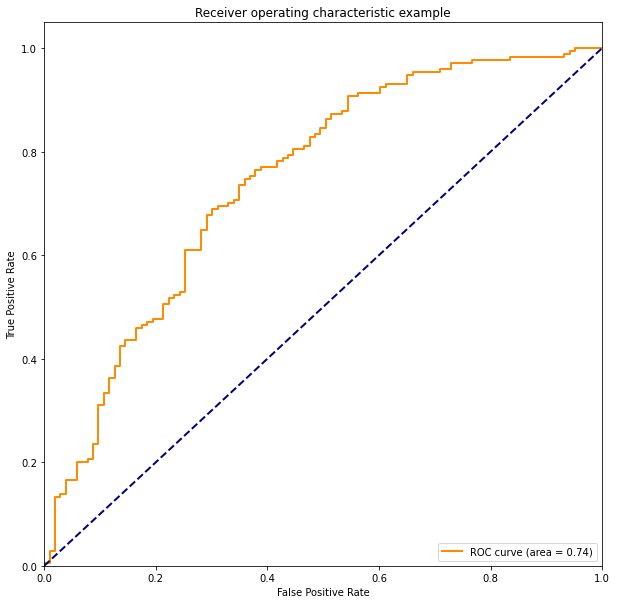

In [24]:
# compute tpr and fpr for for different thresholds
fpr, tpr, thresholds = roc_curve(test_y, best_logClassifer.predict_proba(test_X)[:,1])

# compute roc auc
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10,10))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:0.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")

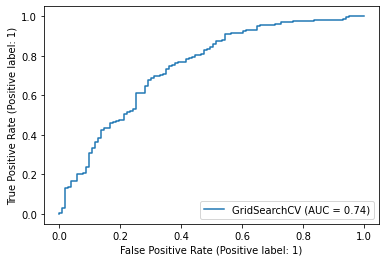

In [25]:
RocCurveDisplay.from_estimator(best_logClassifer, test_X, test_y)
plt.show()


The propotion of correctly identified startup success is good at 0.8 to 0.9 We expect the  True Positive Rate and  False Positive Rate propotion is better at this region.

The propotion of predicting the Startup Success is better at a threshold range of of 0.8 and 0.9 below which the True Positive Rate decreases. This range of threshold value will give us a good rate of startup success preection with less amount of False Positive values. Which is better 


### PR AUC

From this PR AUC chart we are trying to compare the precision and recall value to find the best threshold value for the logistic regression model that we fit in above

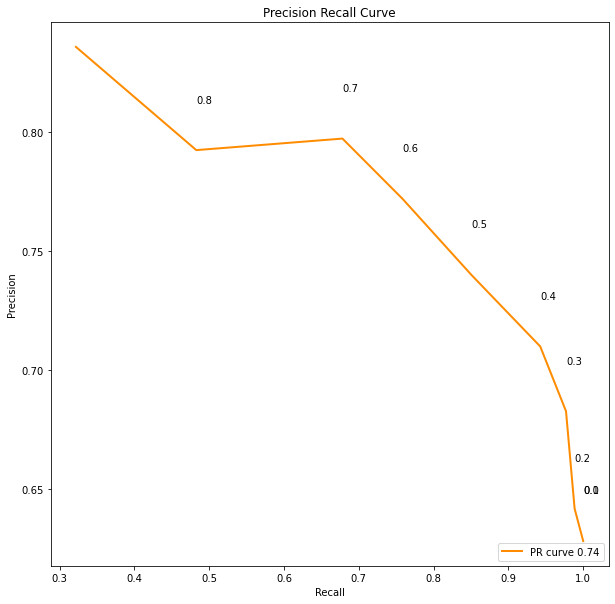

In [26]:
# compute pr auc
pr_auc = auc(recls, precs)

plt.figure(figsize=(10,10))
plt.plot(recls, precs, color='darkorange', lw=2, label=f'PR curve {roc_auc:.2f}')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall Curve')
plt.legend(loc="lower right")

for i in range(len(tprs)):
    plt.annotate(thres[i], (recls[i], precs[i] + 0.02))
    

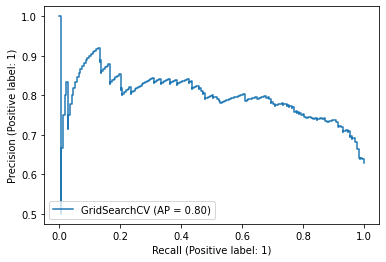

In [27]:
PrecisionRecallDisplay.from_estimator(best_logClassifer, test_X, test_y) 
plt.show()

The highest precission value for the PR AUC curve is close to a threshold value of 0.7
Where the precision for predicting the succuss of Startup is better. Also the recall score is at an good value of 0.7. Since it is a imbalanced dataset we better balance on recall score also for better model result. So the balanced value will be 0.7 as the threshold value in PR AUC

### Conclusion 
For this Startup Success model, we like to go with Precission and best recall value So we consder the PR curve to calculate the best threshold value.
From PR curve for this linear regression model the best threshold value in predicting the Startup Success is at 0.7 